# Problem Statement

The loan eligibility dataset can be used to answer a variety of analytical questions related to loan approval and eligibility. For example, one possible question is whether we can predict loan eligibility based on applicant characteristics such as gender, education level, income, and credit history. Another question might be whether there are significant differences in loan approval rates between different demographic groups or property areas.Here are some possible statistical and analytical problem statements that we will try to address using this dataset:

1) Predicting Loan Eligibility: Can we build a model to predict whether a loan application will be approved or denied based on applicant details such as gender, education, income, credit history, and property area?

2) Identifying Important Features: Which factors are most important in determining loan eligibility? Can we identify the key predictors of loan approval or denial using statistical methods such as regression analysis or feature selection?

3) Loan Amount Prediction: Can we build a model to predict the loan amount that an applicant is likely to be approved for, based on their income, co-applicant income, credit history, and other factors?

4) Impact of Credit History: How much does an applicant's credit history affect their chances of loan approval? Can we quantify the impact of credit history on loan eligibility using statistical methods?

5) Demographic Analysis: Are there any significant differences in loan eligibility between different demographic groups, such as gender, marital status, or education level? Can we identify any patterns or trends in loan approval rates across these groups?

6) Loan Term Analysis: Is there a relationship between the loan term and loan eligibility? Can we identify any patterns or trends in loan approval rates based on loan term?

7) Property Area Analysis: Does the property area have an impact on loan eligibility? Can we identify any differences in loan approval rates between urban, suburban, and rural areas?

To answer these questions, a variety of statistical and analytical techniques can be applied to the dataset, such as regression analysis, classification models, hypothesis testing, or exploratory data analysis. The insights gained from analyzing this dataset can be used to improve the loan approval process and reduce the risk of defaults and other types of losses for lenders.

In [1]:
## Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Preparing to read the dataset
data = pd.read_csv(r'C:\Users\Siddharth Gupta\Downloads\archive_4\loan_train.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
## Checking all the column name
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
## Shape of the dataset
data.shape

(614, 13)

In [6]:
## Null Values in the dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
## Creating function to replace null values with median for numerical data and with mode for categorical data
def replace_null(data):
    num_colm = data.select_dtypes(include =[np.number]).columns ## To identify numerical columns
    cat_colm = data.select_dtypes(include = [object,'category']).columns ## To identify catrgorical columns
    
    ## Replacing null values of numerical columns with median
    for col in num_colm:
        median_value = data[col].median()
        data[col].fillna(median_value, inplace = True)
        
    ## Replacing null values of categorical columns with mode
    for col in cat_colm:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace = True)
        
    return data

In [9]:
df = replace_null(data)

In [10]:
df.shape

(614, 13)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
## Checking the unique value count in each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
## Value count of categorical target column
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [14]:
## Value count of categorical column
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [15]:
## Checking the duplicate rows in the dataset
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [16]:
## Decriptive data of all the columns
df.describe(include = 'all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [17]:
## We could see there are some outliers in ApplicantIncome & CoapplicantIncome with data distribution. 

Once the data is cleaned and ready for exploration, we can use some visualization to understand the data much better with Univariate & Bivariate Analysis

In [18]:
## Defining a function for visualization as we need a lot of visualization to understand about the data
def plot_df(df, column, plot_type = 'Count', figsize = (10,6)):
    fig, ax =plt.subplots(figsize= figsize)
    if plot_type == 'Count':
        sns.countplot(x = column, data = df, ax = ax)
        ax.set_title(f'Count plot of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('count')
        total = len(df[column])
        for p in ax.patches:
            height = p.get_height()
            pct = 100* height/total;
            ax.annotate(f'{pct:.1f}%',(p.get_x()+0.3, height+5))
    elif plot_type == 'swarm':
        sns.swarmplot(y=column, data=df, ax=ax)
        ax.set_title(f"Swarm Plot of {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Value")
    elif plot_type == 'dist':
        sns.histplot(data=data, x=column, ax=ax, kde=True)
        ax.set_title(f"Distribution Plot of {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Frequency")
    else:
        print(f"Invalid plot type: {plot_type}")
    
    plt.show()
    

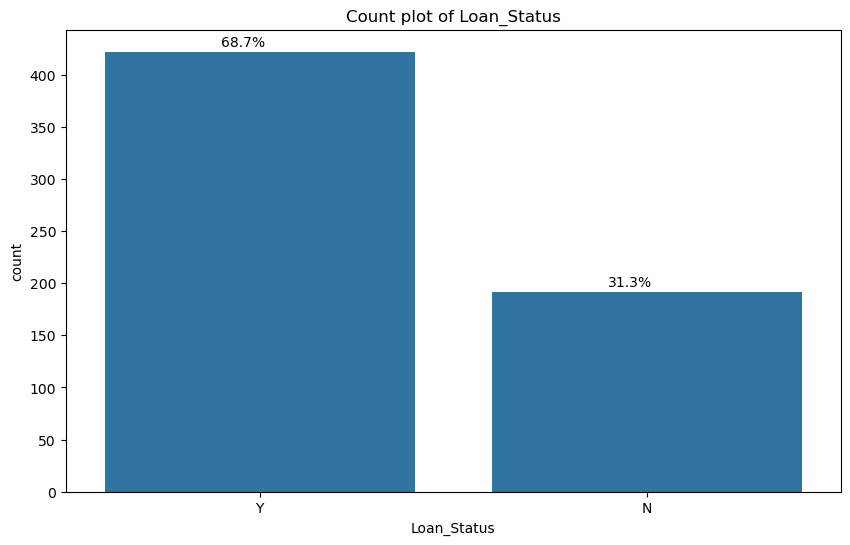

In [19]:
## Percentage of Loan accepted or rejected
plot_df(df,'Loan_Status', plot_type='Count')

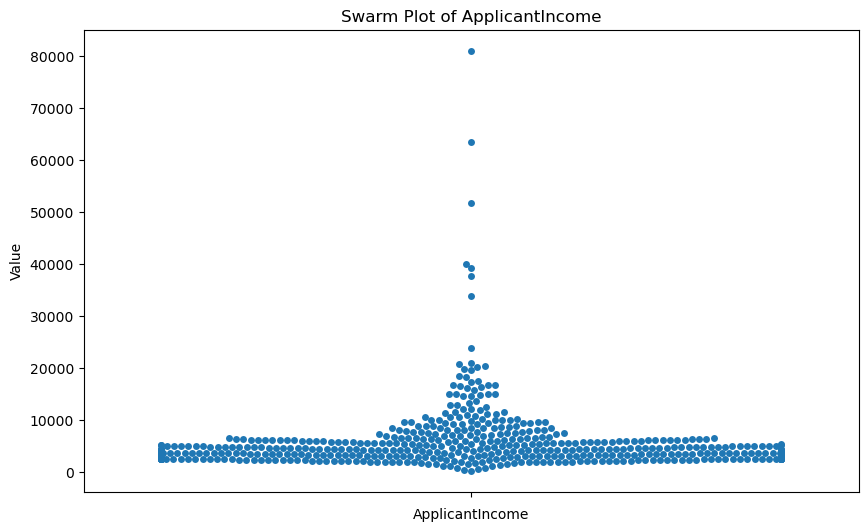

In [20]:
## Distribution of Applicant Income
plot_df(df,'ApplicantIncome', plot_type='swarm')

##There are few outliers in the ApplicantIncome Column

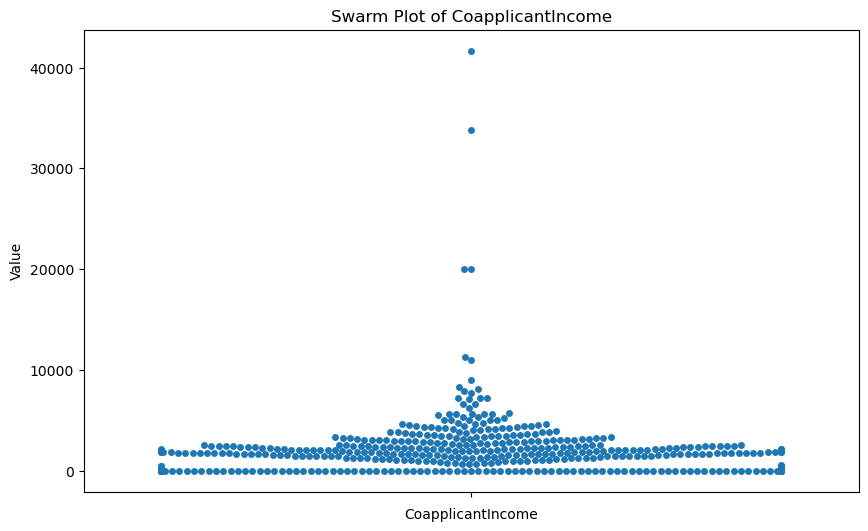

In [21]:
## Distribution of Copplicant Income
plot_df(df,'CoapplicantIncome', plot_type='swarm')

In [22]:
## Creating a new Column Total income to check whether there is any corelation between Total Income & Loan Status
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

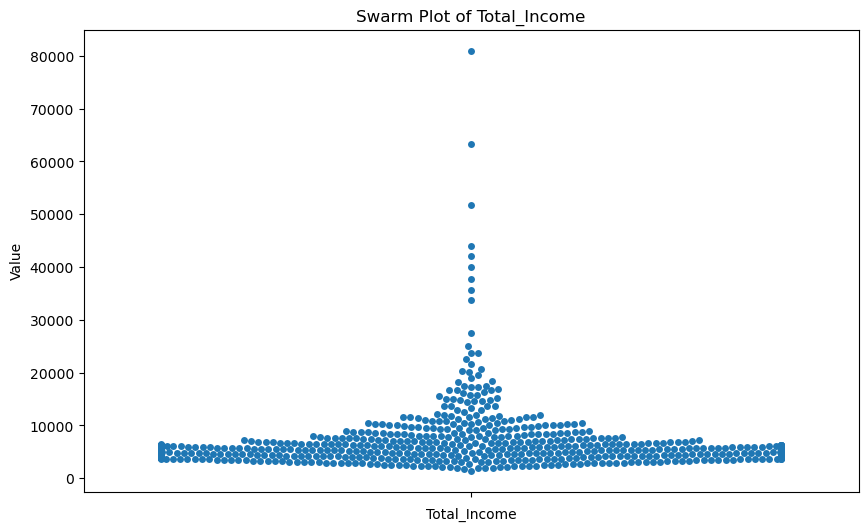

In [23]:
## Checking the distribution of Total income
plot_df(df,'Total_Income', plot_type='swarm')

In [24]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,7024.705081
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


Now we will compare the applicant income with Loan status to see if there is relation among them

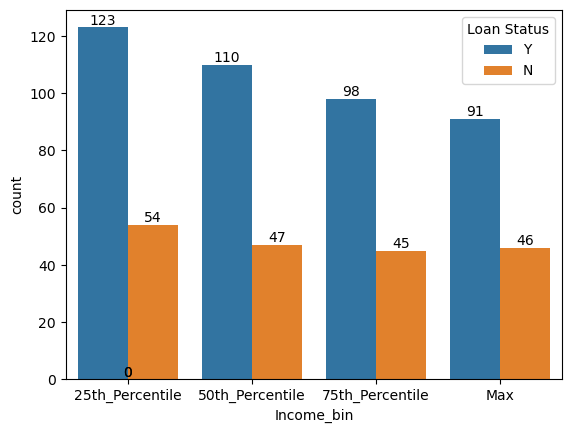

In [25]:
## Creating bins for income with percentiles wise income distribution
bins = [0,3000,4000,6000,81000]
group= ['25th_Percentile','50th_Percentile', '75th_Percentile','Max']

df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

ax = sns.countplot(x = 'Income_bin', hue = 'Loan_Status', data = df)

# Looping through each patch
for p in ax.patches:
    height = p.get_height() #Height of the bar
    # If height is NaN (possible if data does not include a category), continue to next iteration
    if pd.isna(height):
        continue
    # Annotate the bar with its height (count)
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha='center')

plt.legend(title='Loan Status')
plt.show()


We could see in the above chart that most of the loan application accepted is in the first 25th Pecentile bracket according to our data and it subsequently getting reduced in 50th & 75th Pecentile bracket. 
Also most of our data points for Applicant income lies below 6000

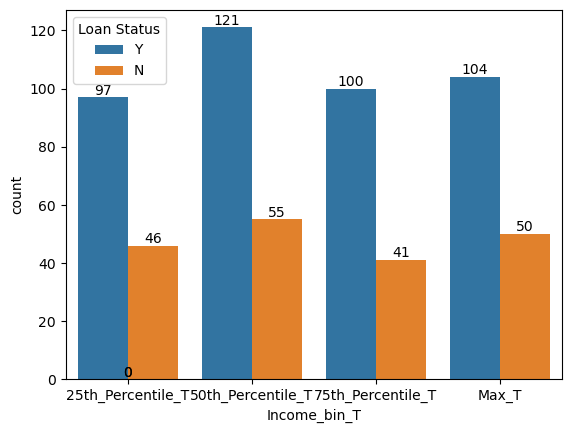

In [26]:
## Creating bins for income with percentiles wise income distribution as done previously
bins = [0,4000,5500,7500,81000]
group= ['25th_Percentile_T','50th_Percentile_T', '75th_Percentile_T','Max_T']

df['Income_bin_T']=pd.cut(df['Total_Income'],bins,labels=group)

ax = sns.countplot(x = 'Income_bin_T', hue = 'Loan_Status', data = df)

# Looping through each patch
for p in ax.patches:
    height = p.get_height() #Height of the bar
    # If height is NaN (possible if data does not include a category), continue to next iteration
    if pd.isna(height):
        continue
    # Annotate the bar with its height (count)
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha='center')

plt.legend(title='Loan Status')
plt.show()

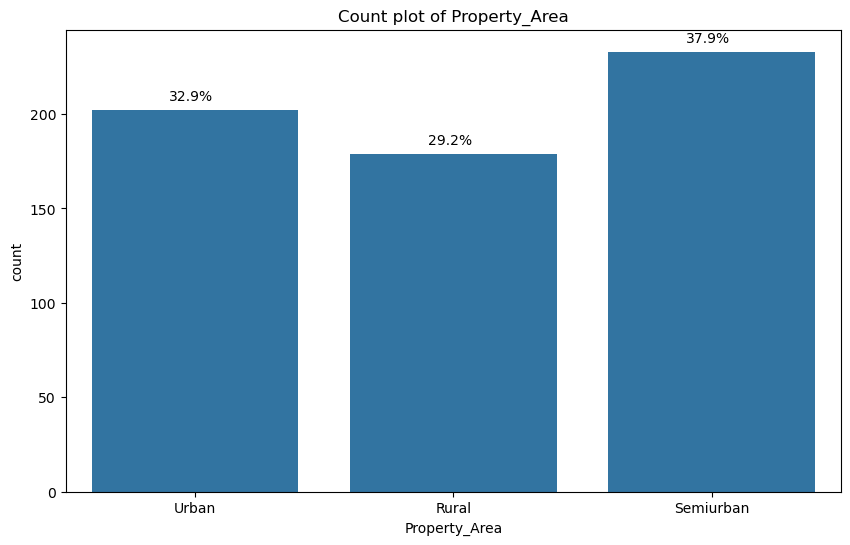

In [27]:
## Count plot for Property Area in our dataset
plot_df(df,'Property_Area', plot_type='Count')

Semiurban constitutes the highest count in our dataset

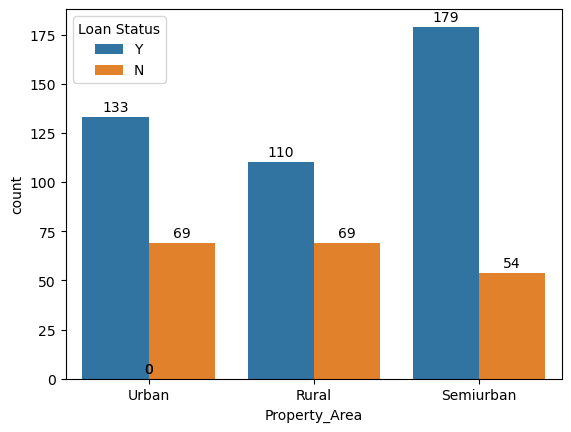

In [28]:
ax = sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = df)

# Loop through each patch (bar in the plot)
for p in ax.patches:
    # Get the height of the bar (which represents the count)
    height = p.get_height()
    # If height is NaN (possible if data does not include a category), continue to next iteration
    if pd.isna(height):
        continue
    # Annotate the bar with its height (count)
    ax.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha='center')

plt.legend(title='Loan Status')
plt.show()

People whose property area is in Semiurban category are the once whose loan application has been accepted the most when compared with Rural & Urban. Also, Rural category has the lowest loan acceptance when compared with other Property_area

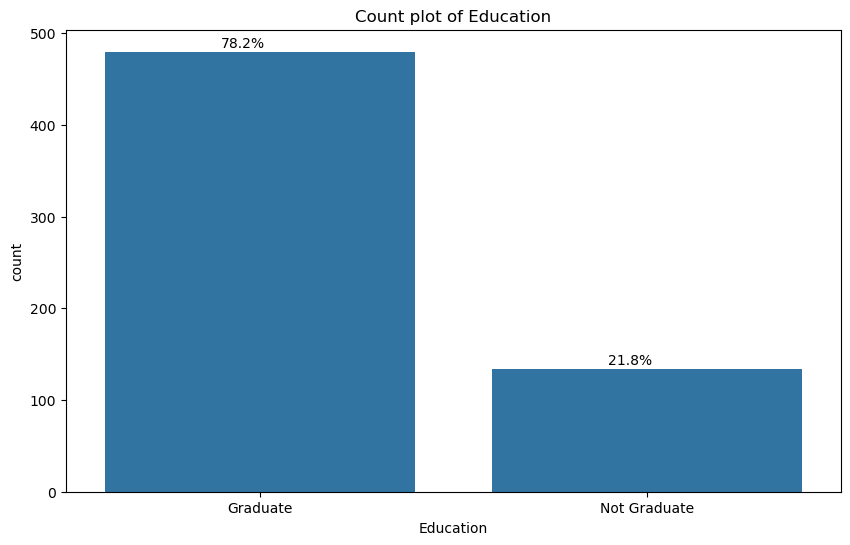

In [29]:
plot_df(df,'Education', plot_type='Count')

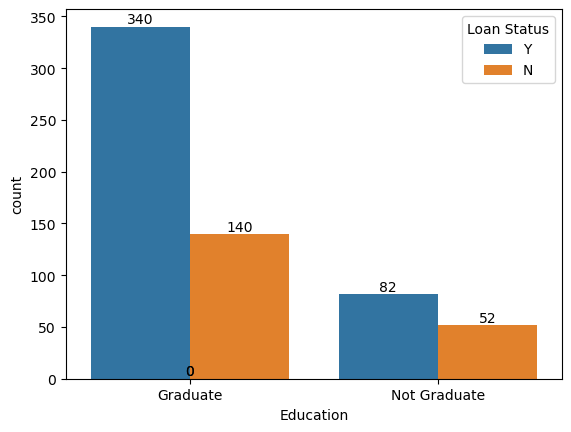

In [30]:
ax = sns.countplot(x = 'Education', hue = 'Loan_Status', data = df)

# Loop through each patch (bar in the plot)
for p in ax.patches:
    # Get the height of the bar (which represents the count)
    height = p.get_height()
    # If height is NaN (possible if data does not include a category), continue to next iteration
    if pd.isna(height):
        continue
    # Annotate the bar with its height (count)
    ax.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha='center')

plt.legend(title='Loan Status')
plt.show()

Most of the people are gratuate in our dataset

In [31]:
Grad_loan_status_approval = 340/(340+140)*100
Not_grad_loan_status_approval = 82/(82+52)*100
#print("Grad_loan = ", Grad_loan, "%, Not_grad_loan = ", Not_grad_loan, "%")
print("Grad_loan_status_approved =",Grad_loan_status_approval)
print ("Not_grad_loan_status_approved =",Not_grad_loan_status_approval)

Grad_loan_status_approved = 70.83333333333334
Not_grad_loan_status_approved = 61.19402985074627


Out of total graduates, approx 71% people's loan got approved and out of total non graduates, approx 61% people's loan got approved. Hence we cannot say that education can be a key factor for approval or rejection of loan as per our data

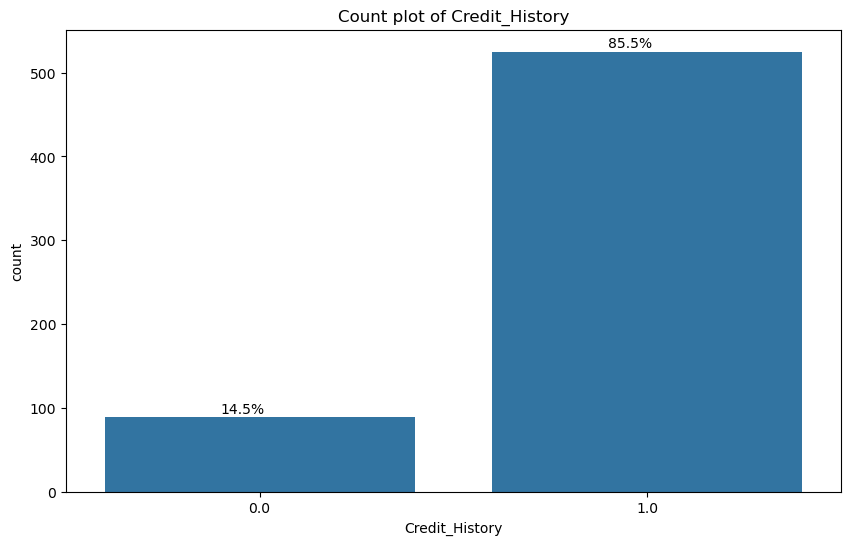

In [32]:
plot_df(df,'Credit_History', plot_type='Count')

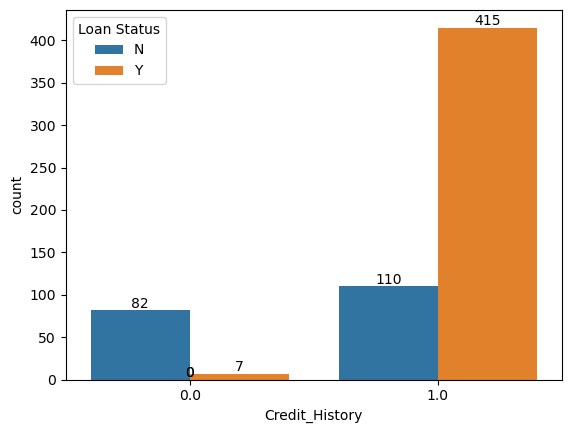

In [33]:
ax = sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = df)

# Loop through each patch (bar in the plot)
for p in ax.patches:
    # Get the height of the bar (which represents the count)
    height = p.get_height()
    # If height is NaN (possible if data does not include a category), continue to next iteration
    if pd.isna(height):
        continue
    # Annotate the bar with its height (count)
    ax.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha='center')

plt.legend(title='Loan Status')
plt.show()

Credit history could be an important criteria for approval or rejection of loan as we can clearly see that those who have a credit score history has a very high chance of Loan approval when compared with those who don't have any credit history.

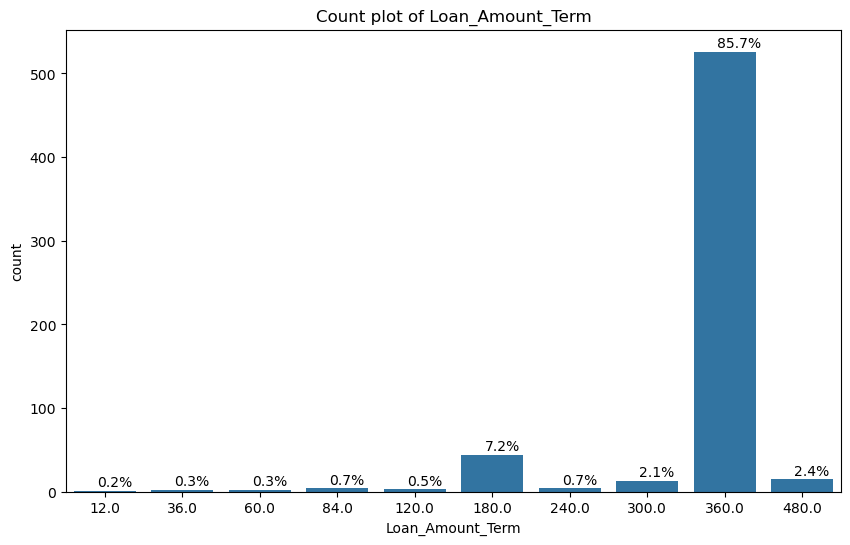

In [34]:
plot_df(df,'Loan_Amount_Term', plot_type='Count')

Most of the people having loan approved have a term of 360

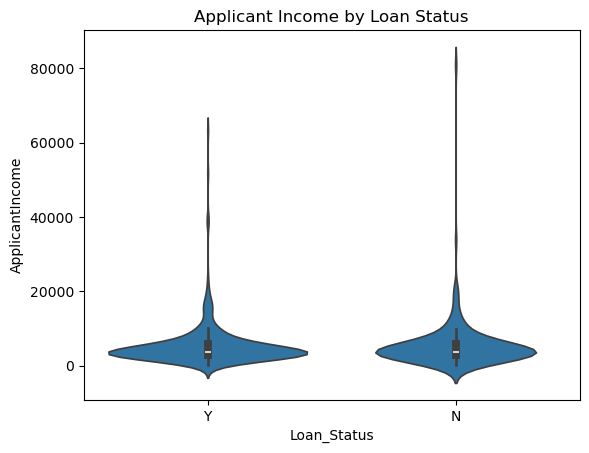

In [35]:
sns.violinplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Loan Status')
plt.show()

It can be seen from the above violin plot that most of the data is distributed in a confined space and we have few outliers.

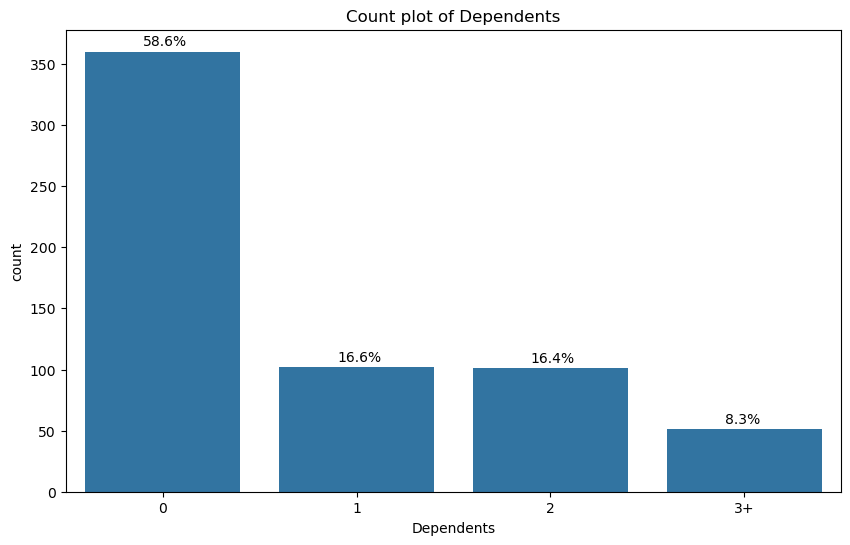

In [36]:
plot_df(df,'Dependents', plot_type='Count')

Above bar graph shows, more than half of the data has profile with 0 dependents

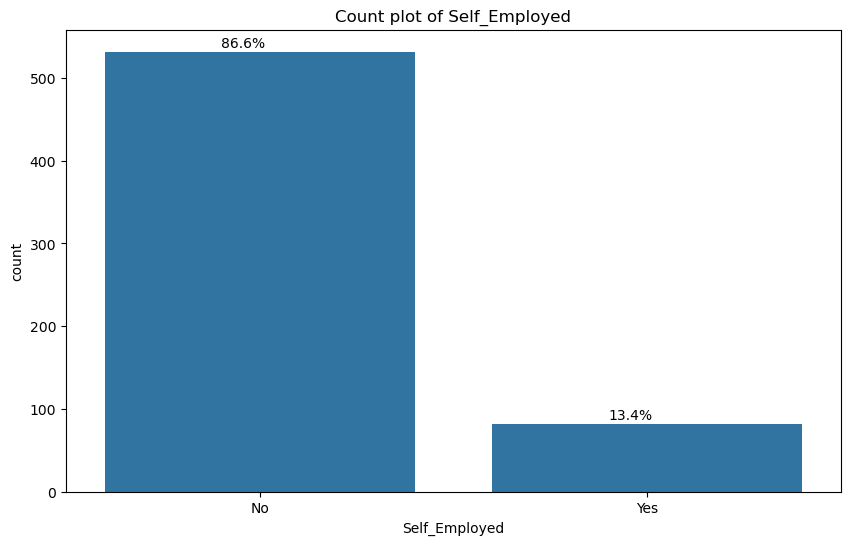

In [37]:
plot_df(df,'Self_Employed', plot_type='Count')

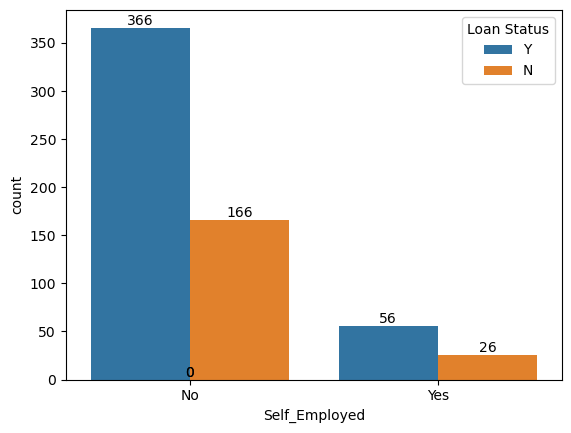

In [38]:
ax = sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = df)

# Loop through each patch (bar in the plot)
for p in ax.patches:
    # Get the height of the bar (which represents the count)
    height = p.get_height()
    # If height is NaN (possible if data does not include a category), continue to next iteration
    if pd.isna(height):
        continue
    # Annotate the bar with its height (count)
    ax.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha='center')

plt.legend(title='Loan Status')
plt.show()

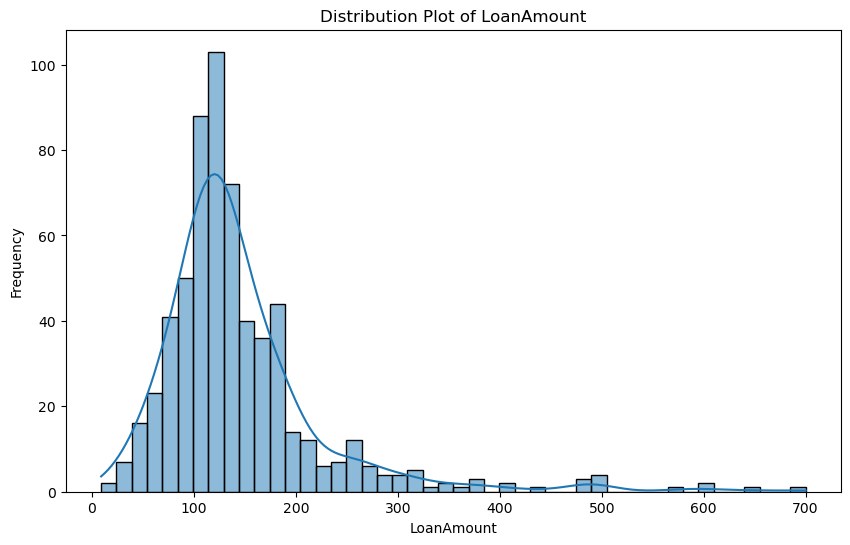

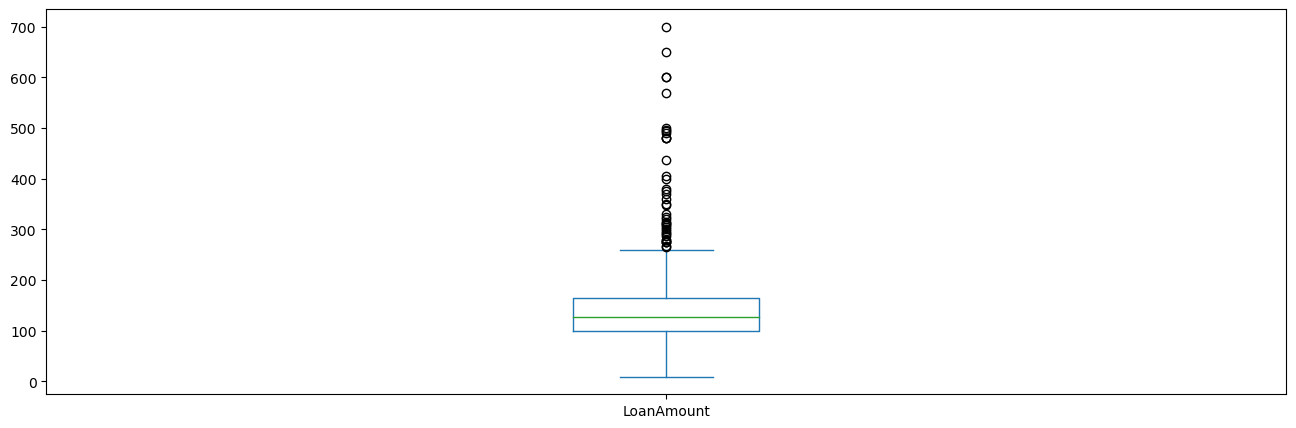

In [39]:
plot_df(df, 'LoanAmount', plot_type='dist')
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

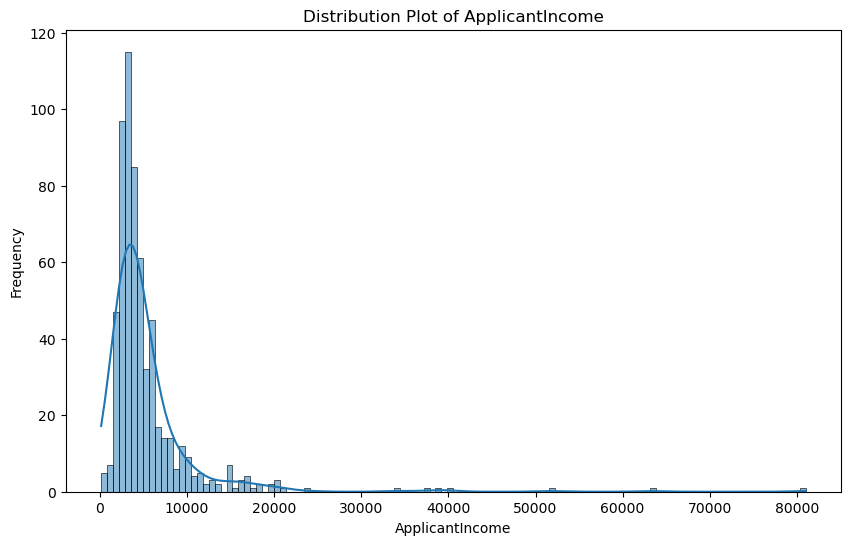

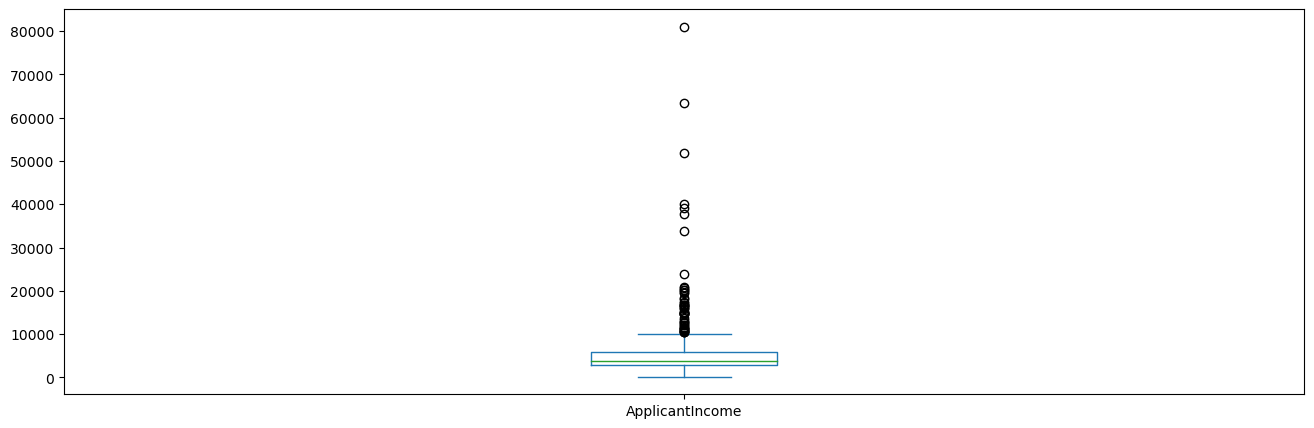

In [40]:
plot_df(df, 'ApplicantIncome', plot_type='dist')
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             614 non-null    object  
 2   Married            614 non-null    object  
 3   Dependents         614 non-null    object  
 4   Education          614 non-null    object  
 5   Self_Employed      614 non-null    object  
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         614 non-null    float64 
 9   Loan_Amount_Term   614 non-null    float64 
 10  Credit_History     614 non-null    float64 
 11  Property_Area      614 non-null    object  
 12  Loan_Status        614 non-null    object  
 13  Total_Income       614 non-null    float64 
 14  Income_bin         614 non-null    category
 15  Income_bin_T       614 non-null    category
dtypes: categ

In [42]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
Total_Income         554
Income_bin             4
Income_bin_T           4
dtype: int64

Since Loan Loan_Amount_Term and Credit_History are categorical variables and have the data type as float, we need to change the data type of these two features to object.

In [43]:
convert_dtype = ['Loan_Amount_Term','Credit_History']

In [44]:
df[convert_dtype] = df[convert_dtype].astype('object')

In [45]:
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term       object
Credit_History         object
Property_Area          object
Loan_Status            object
Total_Income          float64
Income_bin           category
Income_bin_T         category
dtype: object

In [46]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_bin,Income_bin_T
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,75th_Percentile,75th_Percentile_T
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,75th_Percentile,75th_Percentile_T
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,25th_Percentile,25th_Percentile_T
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,25th_Percentile,50th_Percentile_T
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,75th_Percentile,75th_Percentile_T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,25th_Percentile,25th_Percentile_T
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,75th_Percentile,50th_Percentile_T
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Max,Max_T
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Max,Max_T


In [47]:
df['Loan_Status_convert'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

In [48]:
numerical_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income', 'Loan_Status_convert']

In [49]:
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Total_Income,Loan_Status_convert
ApplicantIncome,1.000000,-0.116605,0.565181,0.893037,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,0.342781,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.620316,-0.033214
Total_Income,0.893037,0.342781,0.620316,1.000000,-0.031271
Loan_Status_convert,-0.004710,-0.059187,-0.033214,-0.031271,1.000000


<AxesSubplot:>

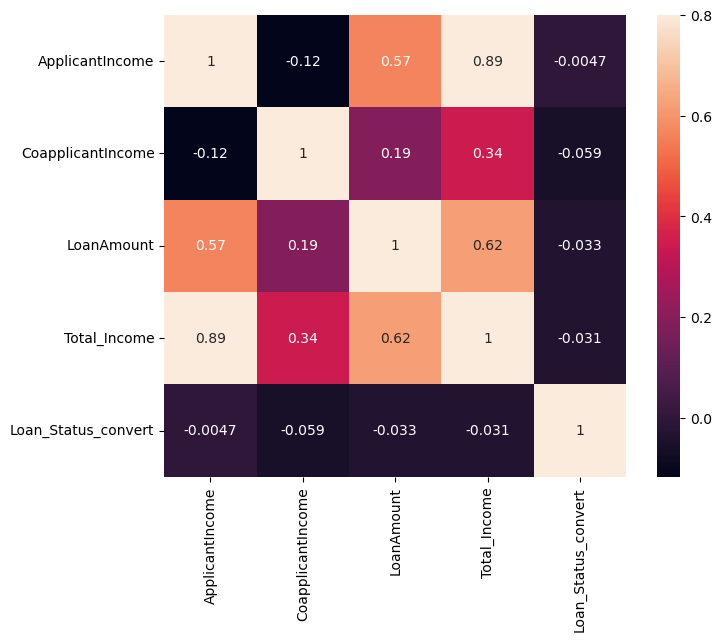

In [50]:
correlation_matrix = df[numerical_columns].corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(correlation_matrix,vmax=.8,square=True, annot = True)

We couldn't find any correlation in the above heat map apart from Total_income and ApplicantIncome

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Loan_ID              614 non-null    object  
 1   Gender               614 non-null    object  
 2   Married              614 non-null    object  
 3   Dependents           614 non-null    object  
 4   Education            614 non-null    object  
 5   Self_Employed        614 non-null    object  
 6   ApplicantIncome      614 non-null    int64   
 7   CoapplicantIncome    614 non-null    float64 
 8   LoanAmount           614 non-null    float64 
 9   Loan_Amount_Term     614 non-null    object  
 10  Credit_History       614 non-null    object  
 11  Property_Area        614 non-null    object  
 12  Loan_Status          614 non-null    object  
 13  Total_Income         614 non-null    float64 
 14  Income_bin           614 non-null    category
 15  Income_bin_T         61

In [52]:
## Dropping below columns. Since Total_Income doesn't show any significant releationship and ApplicantIncome is enough for our model
## We will drop Total_Income as well
df = df.drop(['Income_bin', 'Income_bin_T','Total_Income','Loan_Status_convert','Loan_ID'], axis = 1)

In [53]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
## Performing One hot encoder in Categorical features
##object_columns = df.select_dtypes(include = ['object']).columns
##print(object_columns)

In [55]:
##df = pd.get_dummies(df, columns=object_columns, dtype =int)

In [56]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [57]:
## Defined a function to remove outliers by IQR method
def remove_outliers(data, columns, k=1.5):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [58]:
## Initial Size of Data Frame
initial_size = df.shape[0]

In [59]:
## Removing outliers from the specific columns
columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
new_df = remove_outliers(df, columns)

In [60]:
## Final Size of Data Frame
final_size = new_df.shape[0]

In [61]:
## Number of rows removed
rows_removed = initial_size - final_size

print(f"Initial number of rows: {initial_size}")
print(f"Final number of rows: {final_size}")
print(f"Number of rows removed: {rows_removed}")

Initial number of rows: 614
Final number of rows: 519
Number of rows removed: 95


In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [63]:
## Preprocessing
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [64]:
## One-hot Encoding for Categorical features and Standard Scaler for Numerical features

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(),num_features),
        ('cat', OneHotEncoder(), cat_features)
     ]
)

In [65]:
X = new_df.drop('Loan_Status', axis = 1)
y = new_df['Loan_Status'].replace({'Y': 1, 'N': 0})

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

# Logistic Regression

In [67]:
## Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [68]:
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

In [69]:
logistic_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__copy', 'preprocessor__num__with_mean', 'preprocessor__num__with_std', 'preprocessor__cat__categories', 'preprocessor__cat__drop', 'preprocessor__cat__dtype', 'preprocessor__cat__handle_unknown', 'preprocessor__cat__sparse', 'classifier__C', 'classifier__class_weight', 'classifier__dual', 'classifier__fit_intercept', 'classifier__intercept_scaling', 'classifier__l1_ratio', 'classifier__max_iter', 'classifier__multi_class', 'classifier__n_jobs', 'classifier__penalty', 'classifier__random_state', 'classifier__solver', 'classifier__tol', 'classifier__verbose', 'classifier__warm_start'])

In [70]:
## Hyperparameters for Logistic Regression
log_params = {'classifier__penalty':('l1', 'l2', 'elasticnet'), 'classifier__C':[0.1,1,10]}

In [71]:
## GridSearchCV
logistic_grid = GridSearchCV(logistic_model,log_params,cv = 5, scoring='roc_auc')
logistic_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                 

In [72]:
## Prediction
y_pred = logistic_grid.predict(X_test)
y_pred_proba = logistic_grid.predict_proba(X_test)[:, 1]

In [73]:
## Model Evaluation
print("Logistic Regression")
print(f"Best Parameters: {logistic_grid.best_params_}")
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test,y_pred_proba))

Logistic Regression
Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        34
           1       0.85      0.99      0.91        70

    accuracy                           0.88       104
   macro avg       0.90      0.82      0.84       104
weighted avg       0.89      0.88      0.87       104

ROC AUC Score: 0.821638655462185


# Decision Tree Classifier

In [74]:
## DecisionTree 
from sklearn.tree import DecisionTreeClassifier

In [75]:
## DecisionTree Model
dt_model = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state = 42))
])

In [76]:
# Hyperparameters for Decision Tree
dt_params = {
    'classifier__criterion':['gini', 'entropy', 'log_loss'],
    'classifier__splitter':['best','random'],
    'classifier__max_depth':[1,2,3,4,5],
    'classifier__max_features':['auto','sqrt','log2']
}

In [77]:
## Training the model
dt_grid = GridSearchCV(dt_model,dt_params, cv =5, scoring='roc_auc')
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                 

In [78]:
## Prediction
y_pred = dt_grid.predict(X_test)
y_pred_proba = dt_grid.predict_proba(X_test)[:, 1]

In [79]:
# Evaluate the model
print("\nDecision Tree")
print(f"Best Parameters: {dt_grid.best_params_}")
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))


Decision Tree
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 1, 'classifier__max_features': 'auto', 'classifier__splitter': 'best'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.67      1.00      0.80        70

    accuracy                           0.67       104
   macro avg       0.34      0.50      0.40       104
weighted avg       0.45      0.67      0.54       104

ROC AUC Score: 0.5310924369747899


# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
## Random Forest Model
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))   
])

In [82]:
## Hyperparameters for Random Forest
rf_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 10]
}

In [83]:
rf_grid = GridSearchCV(rf_model,rf_params,cv=5,scoring='roc_auc')
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                 

In [84]:
## Prediction
y_pred = rf_grid.predict(X_test)
y_pred_proba = rf_grid.predict_proba(X_test)[:, 1]

In [85]:
# Evaluate the model
print("\nRandom Forest")
print(f"Best Parameters: {rf_grid.best_params_}")
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))


Random Forest
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        34
           1       0.87      0.94      0.90        70

    accuracy                           0.87       104
   macro avg       0.86      0.82      0.84       104
weighted avg       0.86      0.87      0.86       104

ROC AUC Score: 0.8775210084033613
